# Project: Investigating a TMBD Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I will be looking at movie datasets from TMBD. The report will be based on finding movies I would like to watch (based on genres I like and popularity). And, out of curiosity, I would like to compare movies with high popularity, along with adjusted budget and revenue. I will also show show how the data has been cleaned and used to reach these goals.

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.


In [1]:
# This cell is to set up import statements for all of the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Perform operations to inspect data types and look for instances of missing or possibly errant data.

### General Properties

In [2]:
# Load data  
df = pd.read_csv('tmdb-movies.csv')

# To get an idea of what is in this dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# There were a lot of columns in the last cell. Now, I'm looking at the size of the data. How much is in this?
df.shape

(10866, 21)

In [5]:
#The last cell shows there's 10,866 rows and 21 columns. That's significant. Lets look at more information on the data.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
# Looking at what is in this dataset in another way to determine what will be usefull, what is not, and how is the data represented.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Looking at the columns in this section, the following do not contribute to the goal and some have a lot of null data: id, imdb_id, homepage, overview,  tagline, keywords, and production_companies.
#### I'm also removing budget and revenue because I'm going to focus on the budget_adj and revenue_adj that is adjusted to 2015 inflation.  

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### After inspecting the data, there is a lot of information I don't need and won't help me with my questions later on. 
#### I'll be dropping several columns that are irrelevant to the goal of this project and rows that don't have enough
####  information to be supportive.

In [3]:
# removing columns I don't need for a cleaner, easier to read dataset
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'overview', 'tagline', 'production_companies', 'keywords'], axis=1, inplace=True)

In [4]:
# checking to see the drop function in the previous cell was successful
df.head()

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# looking at the updated info list to see if I need to remove anything else
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


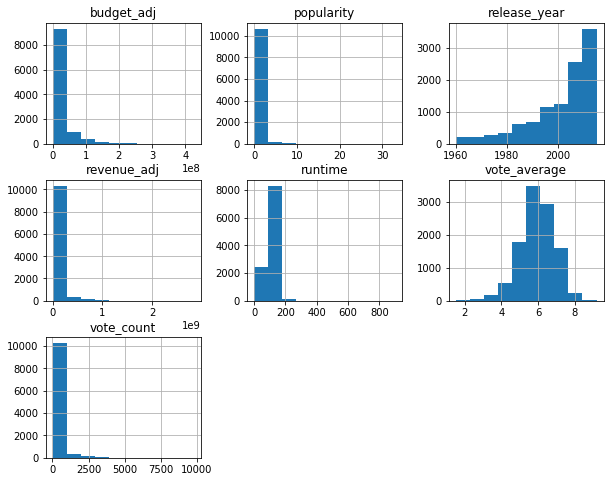

In [11]:
# Looking at how each variable is distributed
df.hist(figsize=(10,8));
# It looks like budget_adj, popularity, revenue_adj, and vote_count are right-skewed.
## This may indicate that as the variable increases, less movies are counted.
## It is also concerning to see how high the graph is at o for budget_adj, revenue_adj, and vote_count.
## I'll need to look at editting rows that have null data.

# Release_year, run_time, and vote_average are left-skewed. 
## As years go on, more movies are being made.
## Most movies' vote_average seem to be around 5-7.

In [6]:
# I want to look into budget_adj and revenue_adj to fix these zeroes. 
# These zeroes probably indicate that the data is unknown and not that the 
# movie had no budget or revenue whatsoever.

mean_budget_adj = df['budget_adj'].mean(skipna=True)
df['budget_adj'] = df.budget_adj.mask(df.budget_adj == 0,mean_budget_adj)
print(mean_budget_adj)

mean_revenue_adj = df['revenue_adj'].mean(skipna=True)
df['revenue_adj'] = df.revenue_adj.mask(df.revenue_adj == 0,mean_revenue_adj)
print(mean_revenue_adj)

# Since there is a significant amount of movies that don't have this data, I'll replace them with averages.

17551039.8229
51364363.2533


In [7]:
# Lets see how much and what data is missing
df[df.isnull().any(axis=1)]


,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,6.9,2015,1.755104e+07,5.136436e+07
424,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,1.755104e+07,5.136436e+07
441,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/9/15,37,8.2,2015,1.755104e+07,5.136436e+07
465,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,7.8,2015,1.755104e+07,5.136436e+07
532,0.126594,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,6.6,2015,1.755104e+07,5.136436e+07
536,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,10/8/15,12,8.0,2015,1.755104e+07,5.136436e+07
538,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,1/1/15,11,8.9,2015,1.755104e+07,5.136436e+07
548,0.108072,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,8/10/15,12,7.5,2015,1.755104e+07,5.136436e+07
556,0.100910,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,6.5,2015,1.755104e+07,5.136436e+07
587,0.062536,The Hunting Ground,NaN,Kirby Dick,103,Documentary,2/27/15,39,7.8,2015,1.755104e+07,5.136436e+07


In [8]:
# There are about 134 movies with NaN in their data.
# The NaN movies do not seem to be within a specific group such as release_year or popularity.
# The NaN is spread amount the following columns: cast, director, genres.
# These are strings and can't be replaced.
# Considering I have 10,866 rows of data, I'll just delete these rather than replacing NaN with averages.

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 12 columns):
popularity        10732 non-null float64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Looking at movies with the highest popularity rating, what factors are associated? Does high popularity rated movies also have high budgets and revenue?

In [7]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10732.000000,10732.000000,10732.000000,10732.000000,10732.000000,1.073200e+04,1.073200e+04
mean,0.652609,102.467853,219.802739,5.964620,2001.260436,2.688867e+07,8.018200e+07
std,1.004757,30.492619,578.789325,0.930286,12.819831,3.066850e+07,1.373645e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210766,90.000000,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,0.387136,99.000000,39.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,0.720621,112.000000,148.000000,6.600000,2011.000000,2.111556e+07,5.136436e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


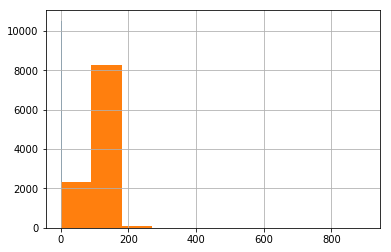

In [8]:
# Lets first approach this question by looking at popularity vs. other columns
df.popularity.hist(label='pop')
df.runtime.hist(label='runtime');

### Research Question 2: Does having a high budget have anything to do with a high revenue?

### Research Question 3: What movies should I watch? I enjoy comedies with action that are no longer than 120mins. This recommendation list will also be based on popularity.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])